In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
#fetch the data
data = pd.read_csv('Meaningful_Binary_Classification_Dataset.csv')
data.head()

,customer_id,account_creation_date,customer_age,account_balance,number_of_transactions,customer_segment,churn
0,33,2020-02-02,59.0,2815.472821,60.0,medium,1
1,62,2020-03-02,64.0,2481.902678,NaN,low,1
2,13,2020-01-13,41.0,9234.637080,71.0,low,0
3,75,2020-03-15,35.0,7266.738456,48.0,high,1
4,89,2020-03-29,38.0,6334.270515,51.0,medium,1


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             100 non-null    int64  
 1   account_creation_date   100 non-null    object 
 2   customer_age            90 non-null     float64
 3   account_balance         90 non-null     float64
 4   number_of_transactions  90 non-null     float64
 5   customer_segment        100 non-null    object 
 6   churn                   100 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 5.6+ KB


In [138]:
data.drop(columns='customer_id', inplace=True, axis=1)

In [3]:
data.describe(include="all")

,customer_id,account_creation_date,customer_age,account_balance,number_of_transactions,customer_segment,churn
count,100.000000,100,90.000000,90.000000,90.000000,100,100.000000
unique,NaN,100,NaN,NaN,NaN,3,NaN
top,NaN,2020-02-02,NaN,NaN,NaN,medium,NaN
freq,NaN,1,NaN,NaN,NaN,36,NaN
mean,50.500000,NaN,43.322222,5210.539205,48.222222,NaN,0.540000
std,29.011492,NaN,14.803452,2416.886246,30.297320,NaN,0.500908
min,1.000000,NaN,19.000000,1004.683393,1.000000,NaN,0.000000
25%,25.750000,NaN,32.000000,3203.318417,21.250000,NaN,0.000000
50%,50.500000,NaN,41.500000,5037.552274,45.000000,NaN,1.000000
75%,75.250000,NaN,56.750000,7099.654616,74.250000,NaN,1.000000


In [139]:
data.describe()

,customer_age,account_balance,number_of_transactions,churn
count,90.000000,90.000000,90.000000,100.000000
mean,43.322222,5210.539205,48.222222,0.540000
std,14.803452,2416.886246,30.297320,0.500908
min,19.000000,1004.683393,1.000000,0.000000
25%,32.000000,3203.318417,21.250000,0.000000
50%,41.500000,5037.552274,45.000000,1.000000
75%,56.750000,7099.654616,74.250000,1.000000
max,69.000000,9979.664365,99.000000,1.000000


In [140]:
data.shape

(100, 6)

In [141]:
# explore the target
target = 'churn'
data[target].value_counts()

churn
1    54
0    46
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

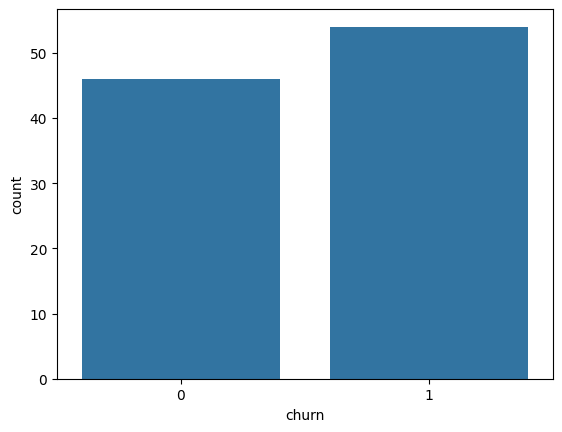

In [142]:
#visualize the classes in the target
sns.countplot(data, x=target)

<Axes: xlabel='churn', ylabel='percent'>

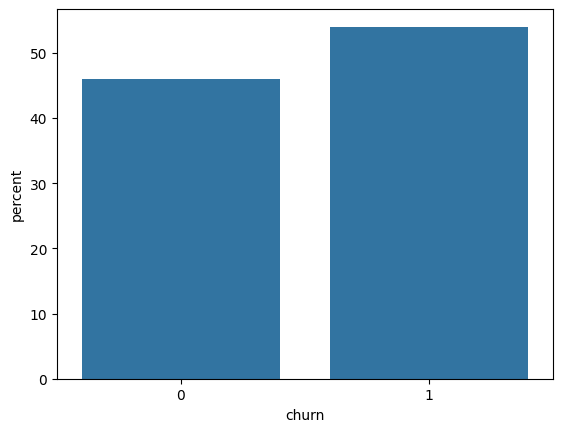

In [143]:
sns.countplot(data, x=target, stat='percent')

In [4]:
# initial exploration
#checking null values
data.isna().sum()

customer_id                0
account_creation_date      0
customer_age              10
account_balance           10
number_of_transactions    10
customer_segment           0
churn                      0
dtype: int64

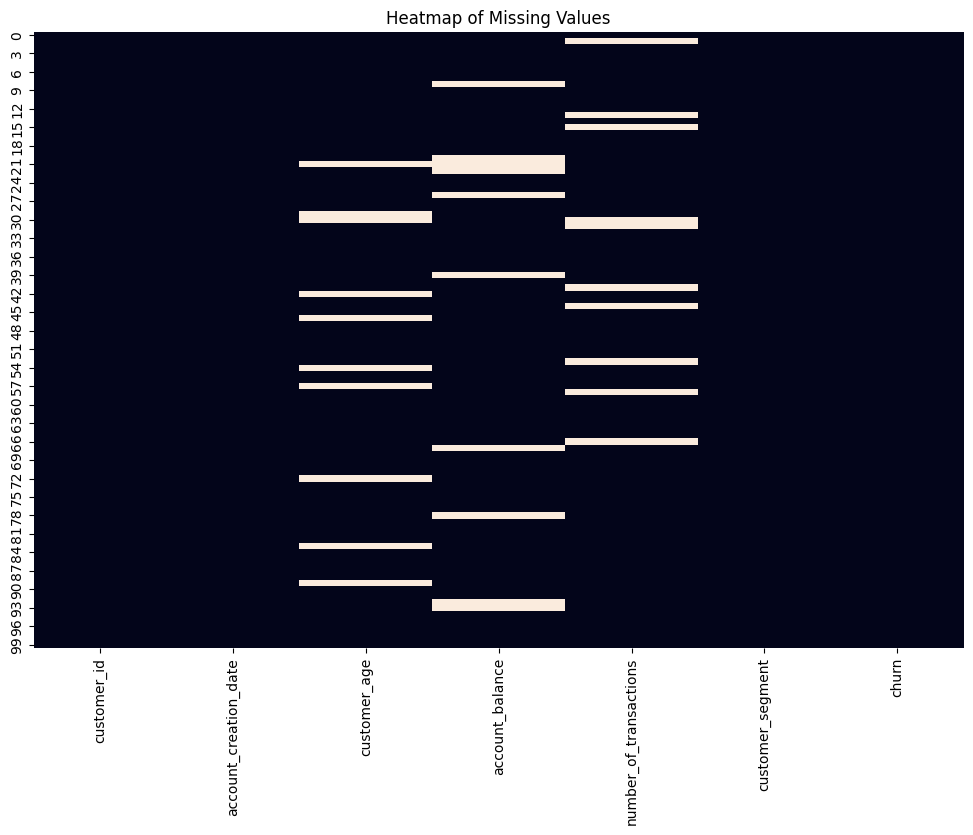

In [12]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [7]:
!pip install missingno


[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


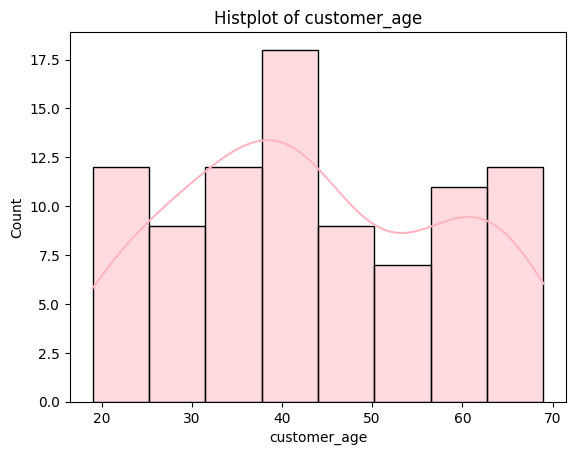

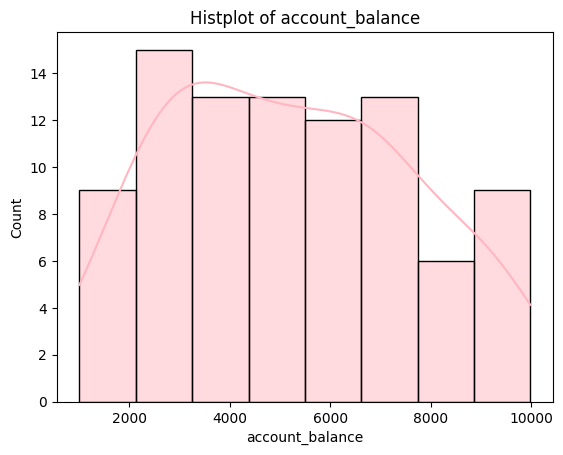

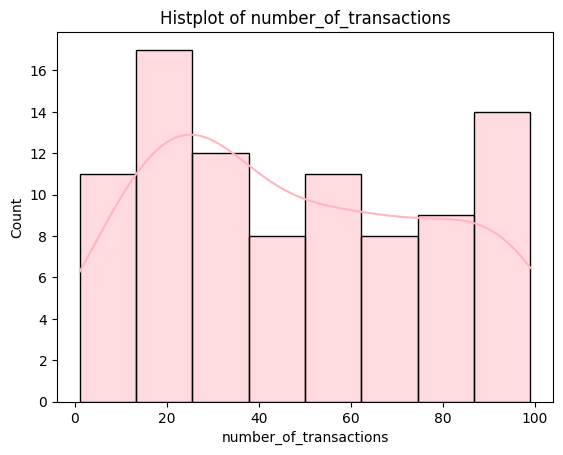

In [40]:
#univariate analysis
numerical_columns = ['customer_age', 'account_balance', 'number_of_transactions']
for col in numerical_columns:
    plt.figure()
    sns.histplot(data, x=col, kde=True, color='lightpink')
    plt.title(f"Histplot of {col}")


Based on the distribution, we impute median for all the numerical variables null values

In [146]:
data.columns

Index(['account_creation_date', 'customer_age', 'account_balance',
       'number_of_transactions', 'customer_segment', 'churn'],
      dtype='object')

In [38]:
print(f"Q1 :{Q1}, Q3: {Q3}, \nIQR: {IQR}, \nQ1 - (1.5*IQR): {Q1 - (1.5*IQR)}, \nQ3 + (1.5 *IQR): {Q3 + (1.5 *IQR)}")

Q1 :32.0, Q3: 56.75, 
IQR: 24.75, 
Q1 - (1.5*IQR): -5.125, 
Q3 + (1.5 *IQR): 93.875


In [32]:
IQR

24.75

In [39]:
Q1 = data['customer_age'].quantile(0.25)
Q3 = data['customer_age'].quantile(0.75)
IQR = Q3 - Q1

data['c'] = data['customer_age'][(data['customer_age'] > Q1 - (1.5*IQR)) | (data['customer_age'] < Q3 + (1.5 *IQR))]
data['c'] 

0     59.0
1     64.0
2     41.0
3     35.0
4     38.0
      ... 
95    42.0
96    32.0
97    58.0
98    31.0
99    68.0
Name: c, Length: 100, dtype: float64

<Axes: xlabel='customer_segment', ylabel='count'>

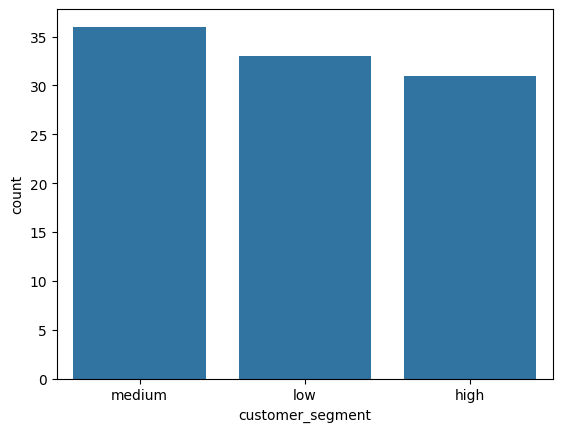

In [147]:
sns.countplot(data, x='customer_segment')

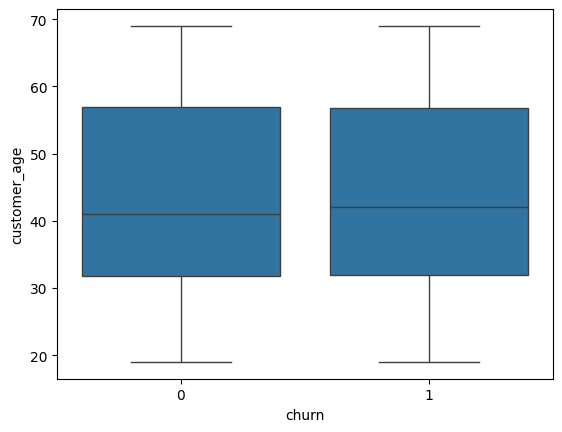

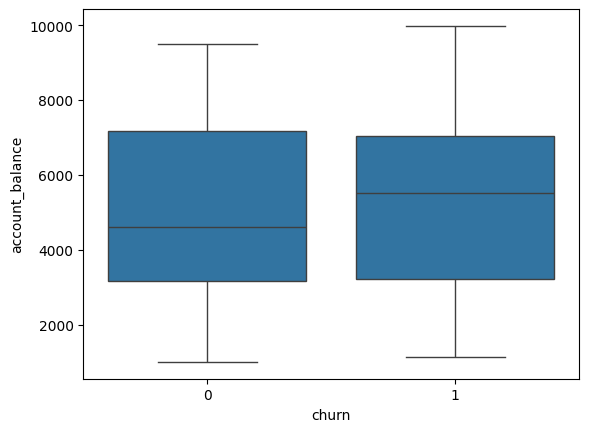

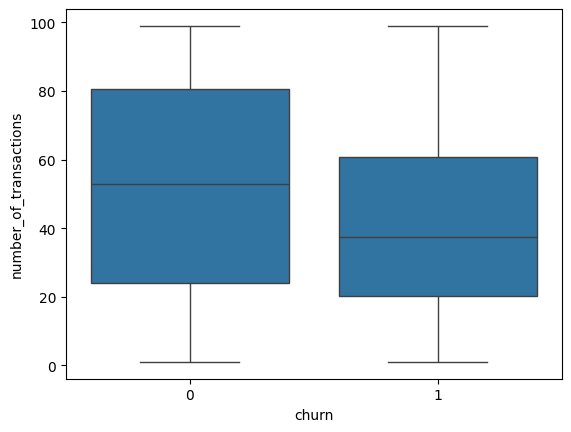

In [148]:
#more visualizations
for col in numerical_columns:
    plt.figure()
    sns.boxplot(data, x=target, y=col)
    plt.show()

<Axes: xlabel='customer_segment', ylabel='count'>

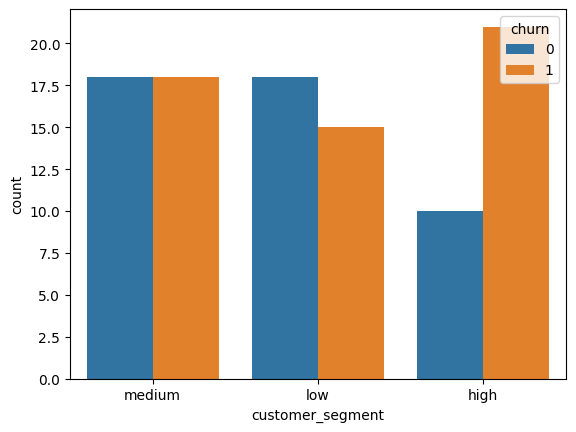

In [134]:
sns.countplot(data, x='customer_segment', hue=target)

<Axes: xlabel='customer_segment', ylabel='number_of_transactions'>

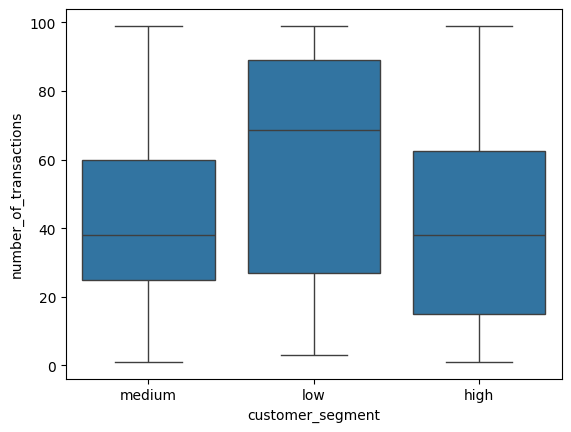

In [130]:
sns.boxplot(data, x='customer_segment', y='number_of_transactions')

<Axes: xlabel='customer_segment', ylabel='churn'>

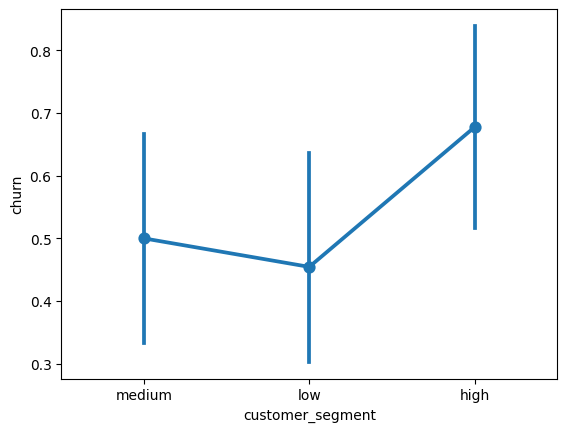

In [30]:
sns.pointplot(data, x='customer_segment', y=target)

<Axes: >

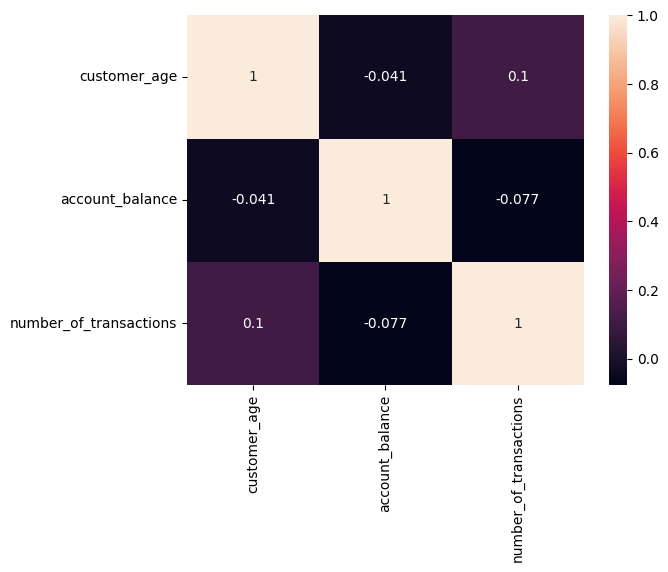

In [31]:
corr_matrix = data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True)

In [82]:
# feature engineering
import datetime
data['account_age'] = data['account_creation_date'].apply(lambda x: (pd.to_datetime("now").date() - pd.to_datetime(x).date()).days)
data['account_age'] 

0     1610
1     1581
2     1630
3     1568
4     1554
      ... 
95    1593
96    1543
97    1545
98    1579
99    1605
Name: account_age, Length: 100, dtype: int64

In [83]:
data.drop('account_creation_date', axis=1, inplace=True)

In [86]:
numerical_columns.append(['account_age'])

In [120]:
data['customer_age'].describe()

count    90.000000
mean     43.322222
std      14.803452
min      19.000000
25%      32.000000
50%      41.500000
75%      56.750000
max      69.000000
Name: customer_age, dtype: float64

In [122]:
#binning the age column
bins = [19, 25, 60, 69]
labels = ['young adult', 'adult', 'senior']
data['age_group'] = pd.cut(data['customer_age'], bins=bins, labels=labels)
data['age_group'][:10]

0     adult
1    senior
2     adult
3     adult
4     adult
5    senior
6     adult
7     adult
8    senior
9     adult
Name: age_group, dtype: category
Categories (3, object): ['young adult' < 'adult' < 'senior']

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


numerical_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])
categotical_cols = ['customer_segment', 'age_group']
cat_pipe = Pipeline(steps=[
    ('ohe', OneHotEncoder())
])

preprocess = ColumnTransformer(transformers=[
    ('num', numerical_pipe, numerical_columns),
    ('cat', cat_pipe, categotical_cols)
])

In [97]:
data_preprocessed = preprocess.fit_transform(data)
data_preprocessed

array([[ 1.1347827 , -1.04257125,  0.42309503,  0.6062481 ,  0.        ,
         0.        ,  1.        ],
       [ 1.4925326 , -1.18883055, -0.10140294, -0.39839161,  0.        ,
         1.        ,  0.        ],
       [-0.15311696,  1.77201662,  0.80772687,  1.29910306,  0.        ,
         1.        ,  0.        ],
       [-0.58241684,  0.90915919,  0.00349665, -0.84874733,  1.        ,
         0.        ,  0.        ],
       [-0.3677669 ,  0.50030332,  0.10839625, -1.33374581,  0.        ,
         0.        ,  1.        ],
       [ 1.4925326 ,  0.90604885, -1.25529847,  0.4676771 ,  1.        ,
         0.        ,  0.        ],
       [ 0.99168273,  0.34323031, -0.34616866, -1.29910306,  1.        ,
         0.        ,  0.        ],
       [ 0.92013275, -0.67196614, -0.97556622,  0.12124962,  0.        ,
         1.        ,  0.        ],
       [ 1.8502825 , -0.06826406,  1.57699056,  1.68017329,  0.        ,
         1.        ,  0.        ],
       [-0.86861677,  0.2565

In [92]:
from sklearn.model_selection import train_test_split

#split our data
X = data[numerical_columns + ['customer_segment']]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [99]:
#modeling
from sklearn.linear_model import LogisticRegression
#using baseline model -Logisitc Regression

log_clf = Pipeline(steps=[
    ('pipe', preprocess),
    ('classifier', LogisticRegression())
])

log_clf.fit(X_train, y_train)

Pipeline(steps=[('pipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['customer_age',
                                                   'account_balance',
                                                   'number_of_transactions',
                                                   'account_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['customer_segment'])])),
                ('classifier', LogisticRegression())])

In [100]:
#predict for train and test data
y_pred_train = log_clf.predict(X_train)
y_pred_test = log_clf.predict(X_test)

In [101]:
from sklearn import metrics
def eval_metrics(test, pred):
    print(f"Accuracy: {metrics.accuracy_score(test, pred)}")
    print(f"Precision: {metrics.precision_score(test, pred)}")
    print(f"Recall: {metrics.recall_score(test, pred)}")
    print(f"f1 score: {metrics.f1_score(test, pred)}")
    print(f"ROC AUC {metrics.roc_auc_score(test, pred)}")

In [104]:
preprocess.fit_transform(X)

array([[ 1.1347827 , -1.04257125,  0.42309503,  0.6062481 ,  0.        ,
         0.        ,  1.        ],
       [ 1.4925326 , -1.18883055, -0.10140294, -0.39839161,  0.        ,
         1.        ,  0.        ],
       [-0.15311696,  1.77201662,  0.80772687,  1.29910306,  0.        ,
         1.        ,  0.        ],
       [-0.58241684,  0.90915919,  0.00349665, -0.84874733,  1.        ,
         0.        ,  0.        ],
       [-0.3677669 ,  0.50030332,  0.10839625, -1.33374581,  0.        ,
         0.        ,  1.        ],
       [ 1.4925326 ,  0.90604885, -1.25529847,  0.4676771 ,  1.        ,
         0.        ,  0.        ],
       [ 0.99168273,  0.34323031, -0.34616866, -1.29910306,  1.        ,
         0.        ,  0.        ],
       [ 0.92013275, -0.67196614, -0.97556622,  0.12124962,  0.        ,
         1.        ,  0.        ],
       [ 1.8502825 , -0.06826406,  1.57699056,  1.68017329,  0.        ,
         1.        ,  0.        ],
       [-0.86861677,  0.2565

In [114]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(log_clf, X, y, cv=10, scoring='roc_auc')
cv_score.mean()

0.5283333333333333

In [106]:
print("Train data")
eval_metrics(y_train, y_pred_train)
print("\nTest data")
eval_metrics(y_test, y_pred_test)


Train data
Accuracy: 0.6666666666666666
Precision: 0.6904761904761905
Recall: 0.7073170731707317
f1 score: 0.6987951807228916
ROC AUC 0.6624820659971304

Test data
Accuracy: 0.48
Precision: 0.5
Recall: 0.6923076923076923
f1 score: 0.5806451612903226
ROC AUC 0.47115384615384615


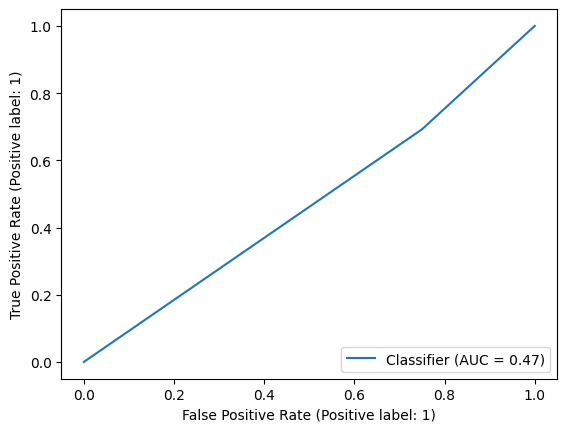

In [108]:
disp = metrics.RocCurveDisplay.from_predictions(
    y_test,
    y_pred_test
)


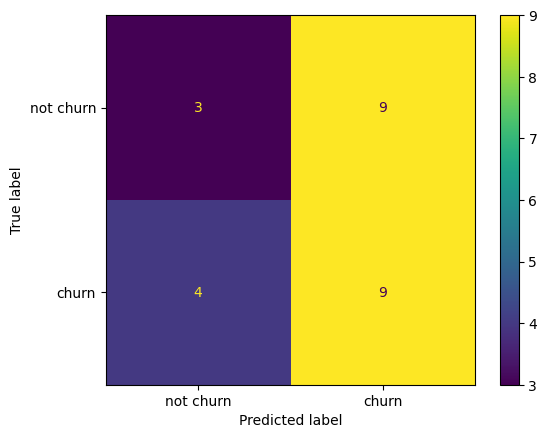

In [112]:
cm = metrics.confusion_matrix(y_test, y_pred_test)
metrics.ConfusionMatrixDisplay(cm, display_labels=['not churn', 'churn']).plot()

In [133]:
print(
    f"Classification report for classifier:\n"
    f"{metrics.classification_report(y_test, y_pred_test)}\n"
)

Classification report for classifier:
              precision    recall  f1-score   support

           0       0.43      0.25      0.32        12
           1       0.50      0.69      0.58        13

    accuracy                           0.48        25
   macro avg       0.46      0.47      0.45        25
weighted avg       0.47      0.48      0.45        25


